## Albumentation
* The library is faster than other libraries on most of the transformations.
* Based on numpy, OpenCV, imgaug picking the best from each of them.

https://albumentations.readthedocs.io/en/latest/

In [1]:
!pip install opencv-python

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip install albumentations

You should consider upgrading via the 'pip install --upgrade pip' command.


### Keypoints augmentations are implemented for spatial transformations of:
* VerticalFlip
* HorizontalFlip
* Flip
* RandomCrop
* RandomRotate90
* Rotate
* CenterCrop
* RandomSizedCrop
* ShiftScaleRotate

https://github.com/albu/albumentations/blob/master/notebooks/example_keypoints.ipynb

In [4]:
from matplotlib import pyplot as plt

import albumentations as albu

from skimage import io
import numpy as np
import cv2
import os

In [5]:
peeping_dog = io.imread('datasets/images/dog_face.jpg')

In [6]:
points = [(120, 1750), (470, 1560), (800, 1460), (1250, 1200), (1540, 1150 ), (1840, 1200), 
          (2250, 1180 ),  (2540, 1140), (3000, 1520), (3560, 1700), (820, 1750), (1300, 1700), 
          (2350, 1720), (2800, 1750), (270, 2300), (1200, 2300), (1750, 2000), (2300, 2300), (3400, 2300)]

In [7]:
def visualize_points(peeping_dog, points, diameter=24):
    im = peeping_dog.copy()

    for (x, y) in points:
        cv2.circle(im, (int(x), int(y)), diameter, (0, 255, 0), -1)

    plt.figure(figsize = (12, 10))    
    plt.imshow(im)

In [8]:
def transformer(transformations):
    return albu.Compose(transformations, 
                        p=1, 
                        keypoint_params={'format': 'xy'})(image=peeping_dog, keypoints=points)

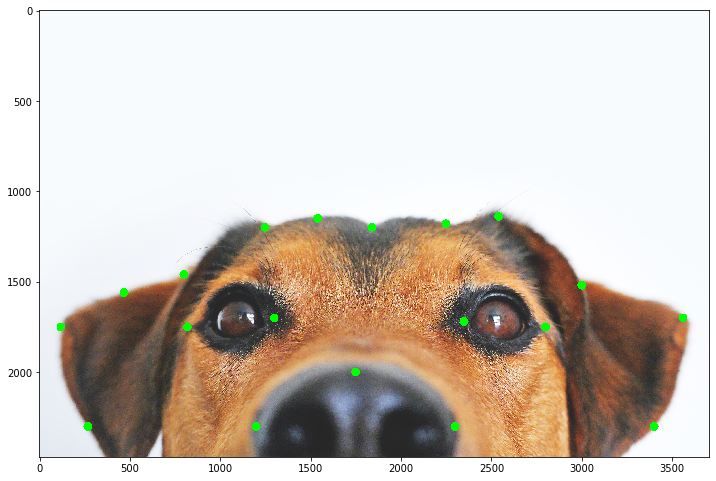

In [9]:
visualize_points(peeping_dog, points)

#### Flip the input vertically around the x-axis.
p(float)  – probability of applying the transform.

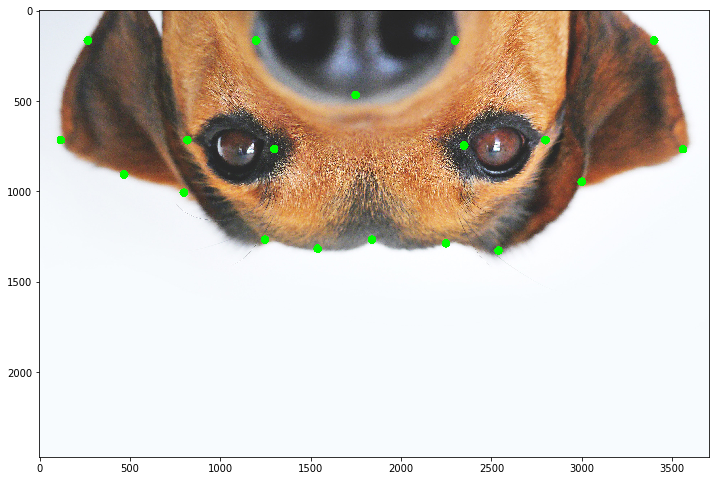

In [12]:
transformed_img = transformer([albu.VerticalFlip(p=1)])

key_points = transformed_img['keypoints']
im = transformed_img['image']

visualize_points(im, key_points)

#### Flip the input horizontally around the y-axis.

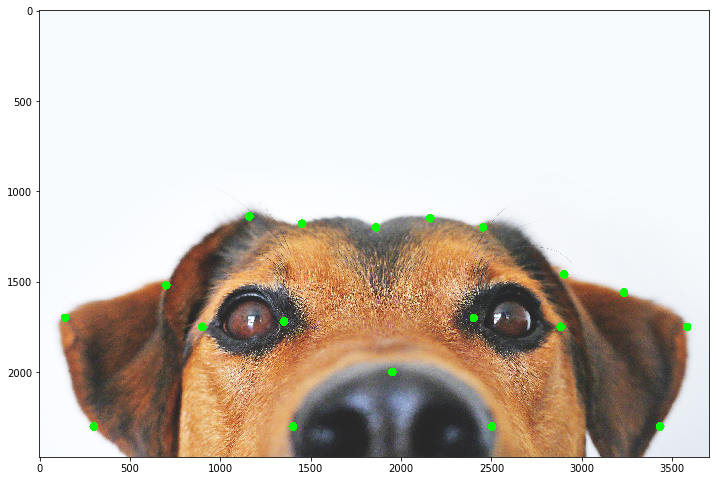

In [13]:
transformed_img = transformer([albu.HorizontalFlip(p=1)])

key_points = transformed_img['keypoints']
im = transformed_img['image']

visualize_points(im, key_points)

#### Flip the input either horizontally, vertically or both horizontally and vertically.

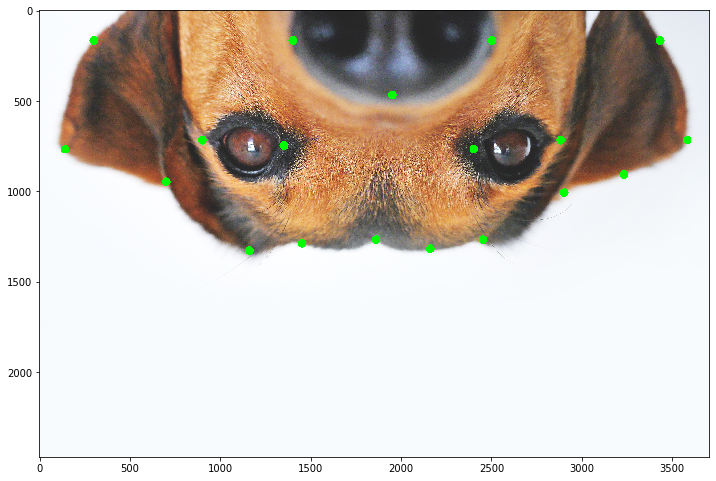

In [15]:
transformed_img = transformer([albu.Flip(p=1)])

key_points = transformed_img['keypoints']
im = transformed_img['image']
visualize_points(im, key_points)

#### Crop a random part of the input.

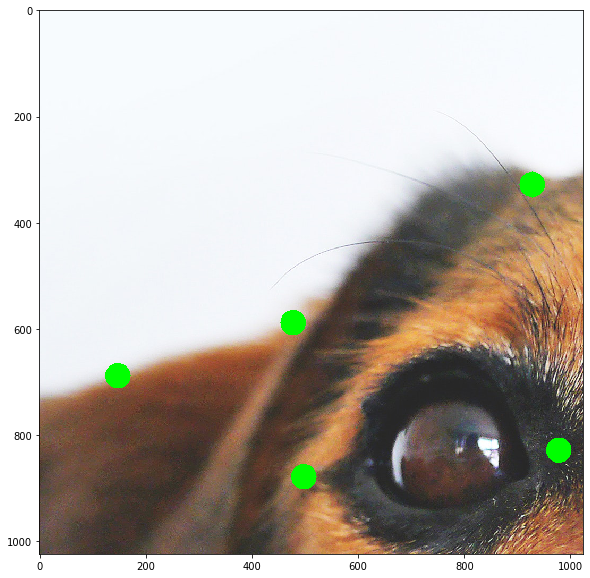

In [17]:
transformed_img = transformer([albu.RandomCrop(width=1024,
                                               height=1024,
                                               p=1)])

key_points = transformed_img['keypoints']
im = transformed_img['image']

visualize_points(im, key_points)

#### Randomly rotate the input by 90 degrees zero or more times.

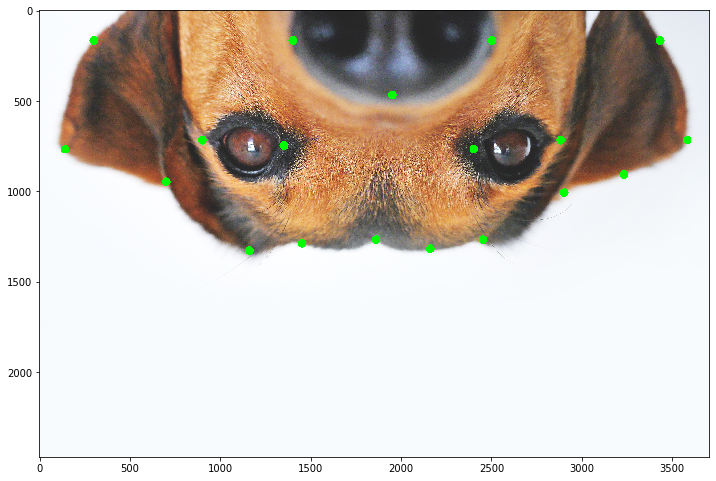

In [18]:
transformed_img = transformer([albu.RandomRotate90(p=1)])

key_points = transformed_img['keypoints']
im = transformed_img['image']

visualize_points(im, key_points)

#### Rotate the input by an angle selected randomly from the uniform distribution

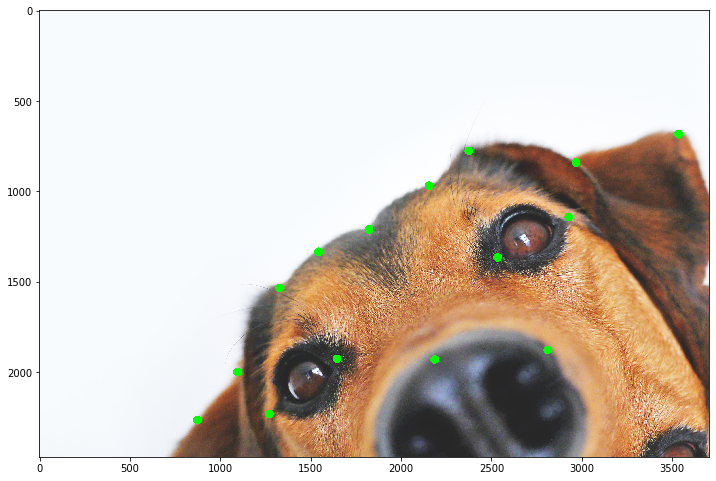

In [19]:
transformed_img = transformer([albu.Rotate(p=1)])

key_points = transformed_img['keypoints']
im = transformed_img['image']

visualize_points(im, key_points)

#### Crop the central part of the input

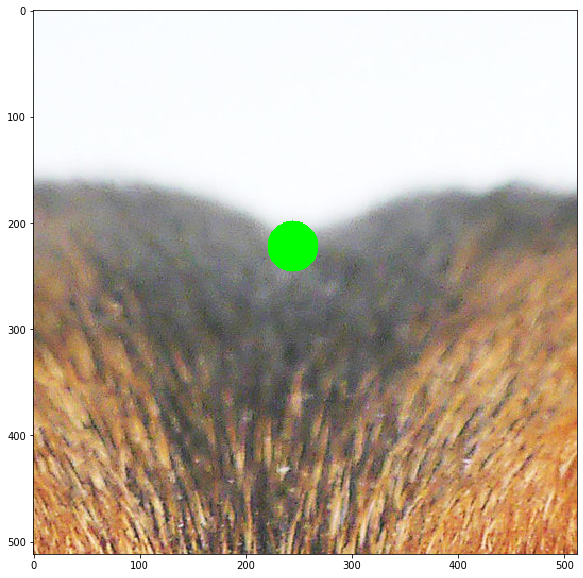

In [20]:
transformed_img = transformer([albu.CenterCrop(height=512,
                                               width=512,
                                               p=1)])

key_points = transformed_img['keypoints']
im = transformed_img['image']

visualize_points(im, key_points)

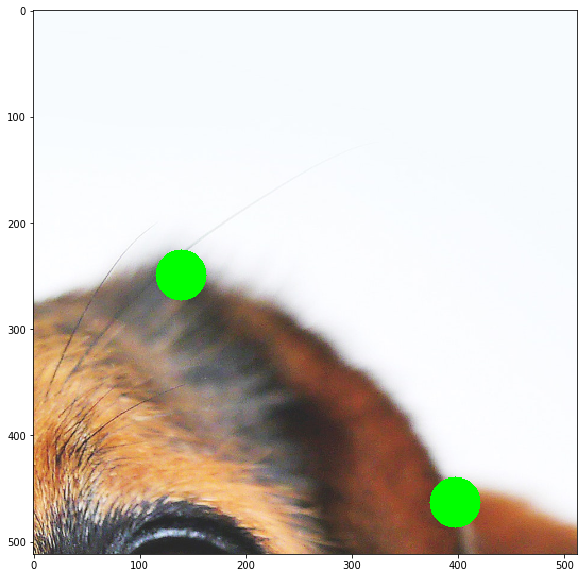

In [22]:
transformed_img = transformer([albu.RandomSizedCrop(min_max_height=(256, 1024),
                                                    height=512,
                                                    width=512,
                                                    p=1)])

key_points = transformed_img['keypoints']
im = transformed_img['image']

visualize_points(im, key_points)

#### Randomly apply affine transforms: translate, scale and rotate the input.

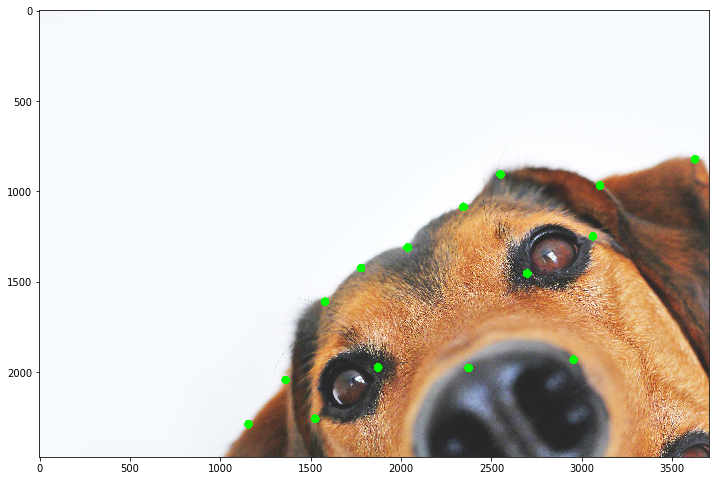

In [23]:
transformed_img = transformer([albu.ShiftScaleRotate(p=1)])

key_points = transformed_img['keypoints']
im = transformed_img['image']

visualize_points(im, key_points)

#### changing hue,brightness contrast and shift values for each RGB channel

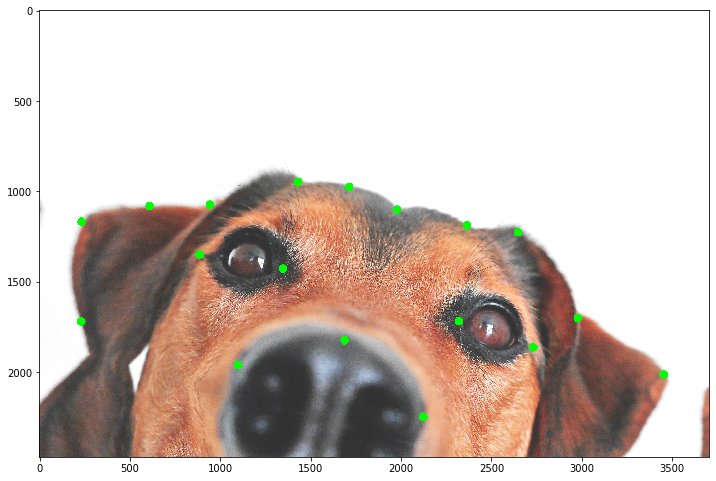

In [26]:
transformed_img = transformer([albu.RandomSizedCrop(min_max_height=(256, 1025), height=512, width=512, p=0.8),
                               albu.ShiftScaleRotate(p=1),
                               albu.OneOf([albu.HueSaturationValue(p=0.5), 
                                           albu.RGBShift(p=0.7)], p=1),                          
                                           albu.RandomBrightnessContrast(p=0.5)])

key_points = transformed_img['keypoints']
im = transformed_img['image']

visualize_points(im, key_points)